In [1]:
import matplotlib.pyplot as plt
from openmmtools.constants import kB
from simtk.openmm import unit
import numpy as np

temperature = 300.0 * unit.kelvin
kT = kB * temperature
beta = 1.0/kT


In [2]:
T_max = 600.0 * unit.kelvin 
beta_m = 1.0 / (kB * T_max)

In [3]:
beta_m/beta

0.5

In [4]:
np.sqrt(beta_m/beta)

0.7071067811865476

In [5]:
functions = {"lambda_rest_bonds": lambda x : -2*(1 - np.sqrt(beta_m/beta))*x + 1 if x < 0.5 else 2*(1 - np.sqrt(beta_m/beta))*x - 1 + 2*np.sqrt(beta_m/beta) }

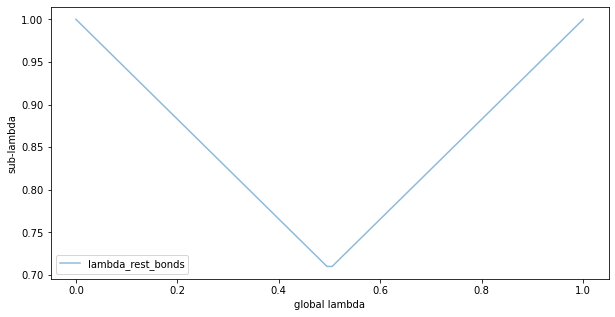

In [6]:
fig = plt.figure(figsize=(10,5))

global_lambda = np.linspace(0.,1.,100)
for f in functions:
    plt.plot(global_lambda, [functions[f](l) for l in global_lambda], alpha=0.5, label=f)

plt.xlabel('global lambda')
plt.ylabel('sub-lambda')
plt.legend()
plt.show()

In [34]:
for x, y in zip(global_lambda, np.array([functions[f](l) for l in global_lambda])):
    print(x, y)

0.0 1.0
0.010101010101010102 0.9940829652764959
0.020202020202020204 0.9881659305529918
0.030303030303030304 0.9822488958294877
0.04040404040404041 0.9763318611059837
0.05050505050505051 0.9704148263824796
0.06060606060606061 0.9644977916589754
0.07070707070707072 0.9585807569354714
0.08080808080808081 0.9526637222119673
0.09090909090909091 0.9467466874884632
0.10101010101010102 0.9408296527649591
0.11111111111111112 0.934912618041455
0.12121212121212122 0.928995583317951
0.13131313131313133 0.9230785485944468
0.14141414141414144 0.9171615138709427
0.15151515151515152 0.9112444791474387
0.16161616161616163 0.9053274444239345
0.17171717171717174 0.8994104097004305
0.18181818181818182 0.8934933749769264
0.19191919191919193 0.8875763402534222
0.20202020202020204 0.8816593055299182
0.21212121212121213 0.8757422708064141
0.22222222222222224 0.86982523608291
0.23232323232323235 0.8639082013594059
0.24242424242424243 0.8579911666359019
0.25252525252525254 0.8520741319123978
0.2626262626262626

In [8]:
functions = {"lambda_rest_bonds": lambda x : (np.sqrt(beta_m / beta) - 1) * x + 1}

No handles with labels found to put in legend.


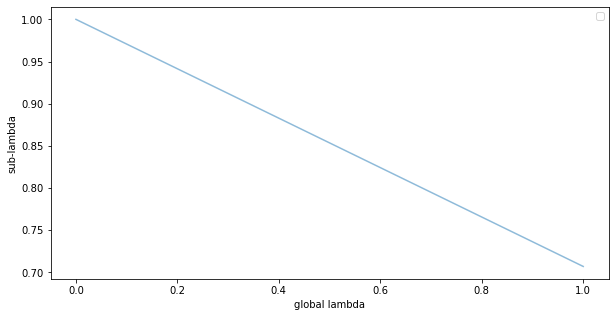

In [9]:
fig = plt.figure(figsize=(10,5))

global_lambda = np.linspace(0.,1.,100)
for f in functions:
    plt.plot(global_lambda, [functions[f](l) for l in global_lambda], alpha=0.5)

plt.xlabel('global lambda')
plt.ylabel('sub-lambda')
plt.legend()
plt.show()

In [10]:
functions = {"lambda_alchemical_bonds_old": lambda x: 1 - x}

No handles with labels found to put in legend.


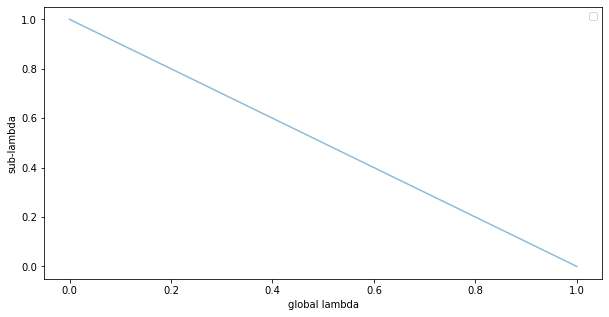

In [11]:
fig = plt.figure(figsize=(10,5))

global_lambda = np.linspace(0.,1.,100)
for f in functions:
    plt.plot(global_lambda, [functions[f](l) for l in global_lambda], alpha=0.5)

plt.xlabel('global lambda')
plt.ylabel('sub-lambda')
plt.legend()
plt.show()

In [18]:
import math

In [28]:
T_max = 1200 
T_min = 300
n_replicas = 24
temperatures = [T_min + (T_max - T_min) * (math.exp(float(i) / float(n_replicas-1)) - 1.0) / (math.e - 1.0)
               for i in range(n_replicas)]

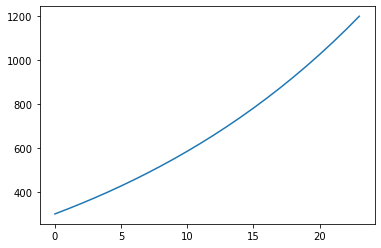

In [29]:
plt.plot(temperatures)